In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


our target variable is Next_Tmax and Next_Tmin, and its a regressor problem,

we can see float,object datatypes and a date column we will do feature engineering into that.

# EDA and Feature Engineering

In [3]:
df.shape

(7752, 25)

there are 7752 rows and 25 columns

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

above are the column names

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

float and object datatypes present in the dataset

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

except lat lon DEM slope and solar radiation column every column has null values we need to impute those

In [7]:
for i in df.columns:
    if df[i].dtypes=='float64':
        if df[i].isnull().sum()!=0:
            df[i].fillna(df[i].mean(),inplace=True)

imputed the float datatype columns with their mean value

In [8]:
df['Date'].mode()

0      01-07-2013
1      01-07-2014
2      01-07-2015
3      01-07-2016
4      01-07-2017
          ...    
305    31-07-2013
306    31-07-2014
307    31-07-2015
308    31-07-2016
309    31-07-2017
Length: 310, dtype: object

we cant see a mode for date column so we will simply drop the null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

now there arent any null values present

In [11]:
df['Date']=pd.to_datetime(df['Date'])

df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Date']=pd.DatetimeIndex(df['Date']).day


from the date column we made month year and date column separately

In [12]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
0,1.0,30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,4.0,30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,5.0,30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013


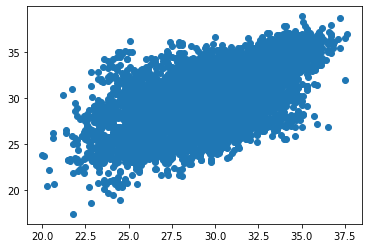

In [28]:
plt.scatter(df['Present_Tmax'],df['Next_Tmax'])

next_tmax increases linearly with present tmax

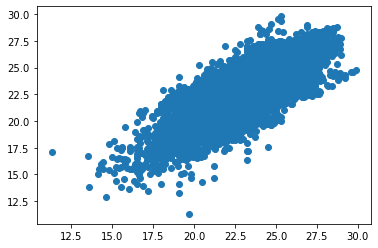

In [29]:
plt.scatter(df['Present_Tmin'],df['Next_Tmin'])

next tmin increases linearly with present tmin

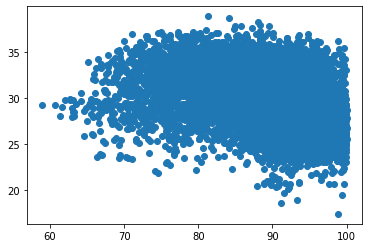

In [30]:
plt.scatter(df['LDAPS_RHmax'],df['Next_Tmax'])

we can see there is not much of a relationship between the two

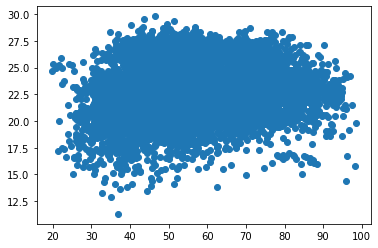

In [31]:
plt.scatter(df['LDAPS_RHmin'],df['Next_Tmin'])

we can see there is not much of a relationship between the two

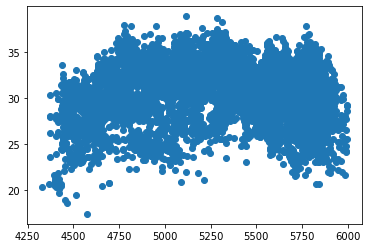

In [32]:
plt.scatter(df['Solar radiation'],df['Next_Tmax'])

next tmax increases with solar radiation till 5250 and then again it starts decreasing

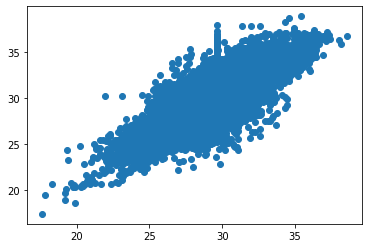

In [33]:
plt.scatter(df['LDAPS_Tmax_lapse'],df['Next_Tmax'])

next tmax increases linearly with ldaps tmax lapse

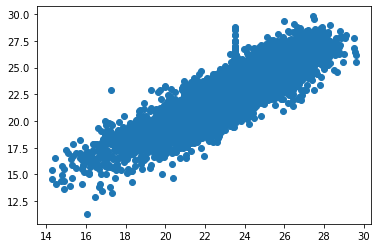

In [34]:
plt.scatter(df['LDAPS_Tmin_lapse'],df['Next_Tmin'])

next tmin increases linearly with ldaps tmin kapse

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

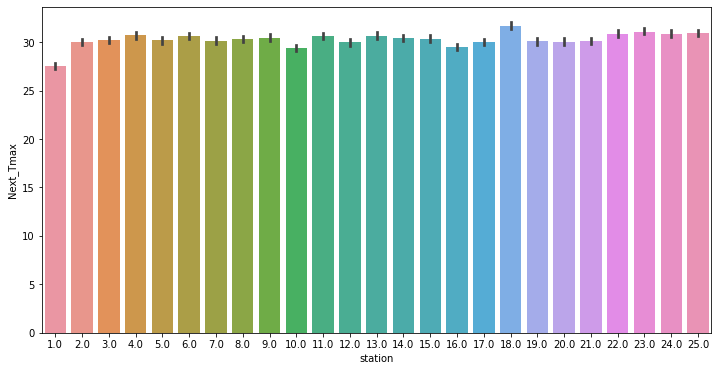

In [35]:
plt.figure(figsize=(12,6))
sn.barplot(df['station'],df['Next_Tmax'])

station 18 have the highes next tmax

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

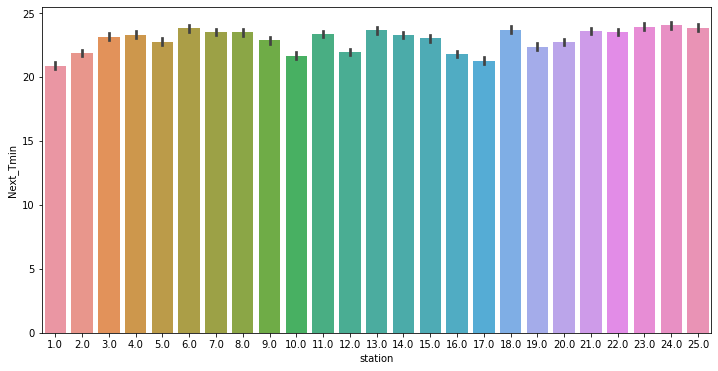

In [36]:
plt.figure(figsize=(12,6))
sn.barplot(df['station'],df['Next_Tmin'])

station 1 and 17 have the lowest next tmin and 18 have the highes next tmin

<AxesSubplot:xlabel='Month', ylabel='Next_Tmin'>

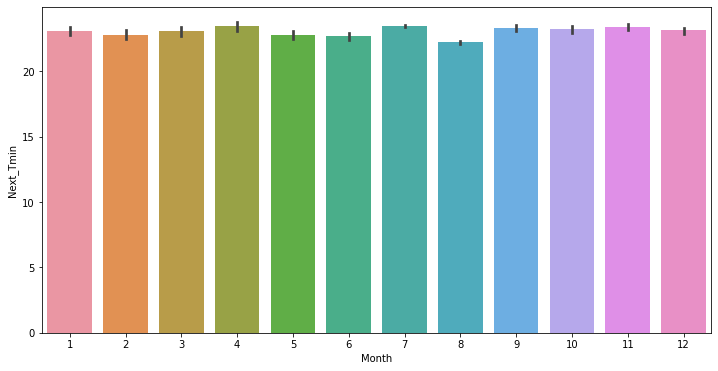

In [37]:
plt.figure(figsize=(12,6))
sn.barplot(df['Month'],df['Next_Tmin'])

highest next tmin is 7th month i.e july and lowest in 8th month i.e. august

<AxesSubplot:xlabel='Month', ylabel='Next_Tmax'>

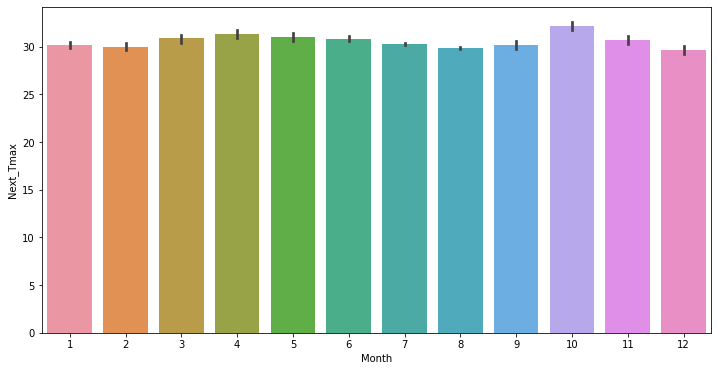

In [38]:
plt.figure(figsize=(12,6))
sn.barplot(df['Month'],df['Next_Tmax'])

highes next tmax is in 10th month i.e. october and lower is 8th i.e august

<AxesSubplot:xlabel='Year', ylabel='Next_Tmin'>

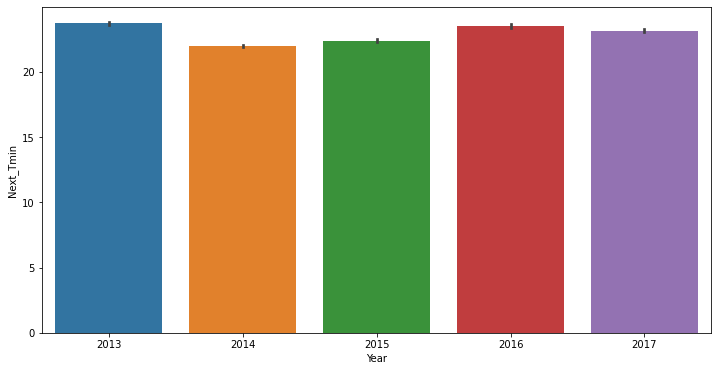

In [39]:
plt.figure(figsize=(12,6))
sn.barplot(df['Year'],df['Next_Tmin'])

2013 have the highest next tmin wherase 2014 have the lowest next tmin

<AxesSubplot:xlabel='Year', ylabel='Next_Tmax'>

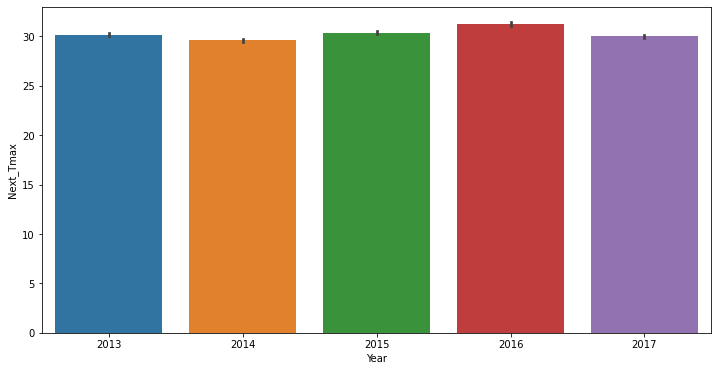

In [40]:
plt.figure(figsize=(12,6))
sn.barplot(df['Year'],df['Next_Tmax'])

2016 have the highest next tmax and 2014 have the lowest next tmax

<AxesSubplot:>

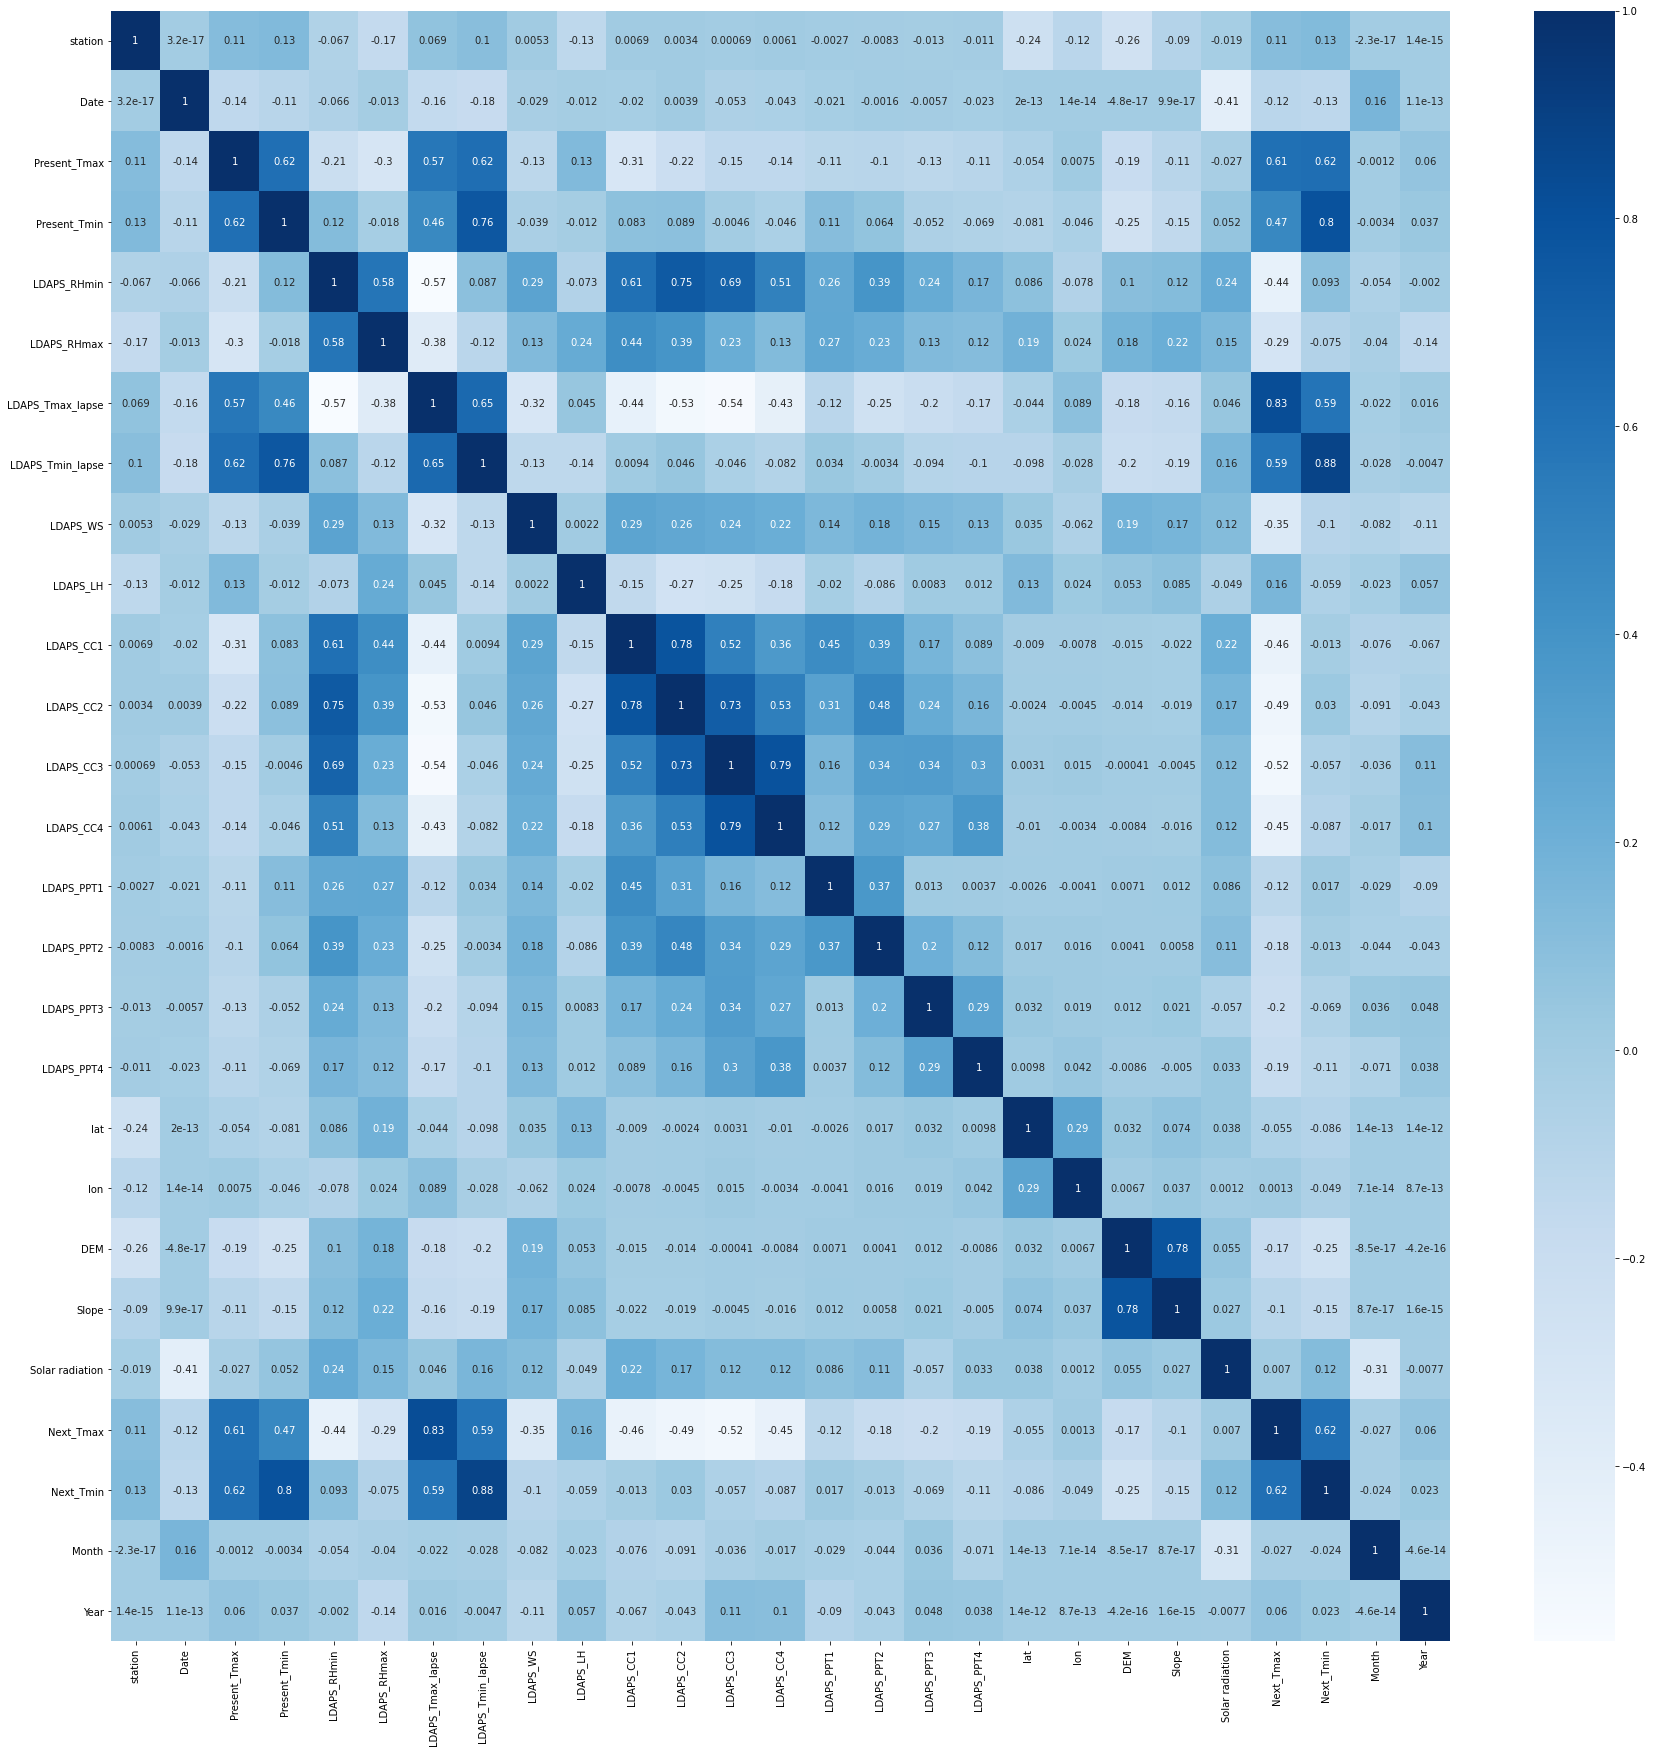

In [41]:
df_correlation=df.corr()
plt.figure(figsize=(30,30))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

for next ymax highest correlation is with ldaps tmax lapse and lowest is with ldaps_CC3

for next tmin highes correlation is with ldaps tmin lapse and lowest is DEM

DEM and slope are correlated with each other

station                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Date                AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Present_Tmax        AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Present_Tmin        AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
LDAPS_RHmin            AxesSubplot(0.125,0.739237;0.168478x0.0639831)
LDAPS_RHmax         AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
LDAPS_Tmax_lapse    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
LDAPS_Tmin_lapse    AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
LDAPS_WS               AxesSubplot(0.125,0.662458;0.168478x0.0639831)
LDAPS_LH            AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
LDAPS_CC1           AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
LDAPS_CC2           AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
LDAPS_CC3              AxesSubplot(0.125,0.585678;0.168478x0.0639831)
LDAPS_CC4           AxesSubplot(0.327174,0.585678;0.168478x0.0639831)
LDAPS_PPT1          

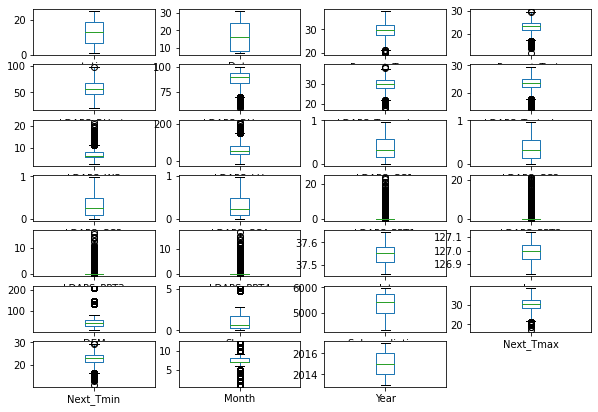

In [42]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(10,10))

black dots represent the outliers, there are many outliers present in almost every column

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))

In [44]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(6888, 27)

In [45]:
df.shape

(7750, 27)

In [46]:
((7750-6888)/7750)*100

11.122580645161289

as the data loss is more than 6% we will not remove the outliers

In [47]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [48]:
df_new.shape

(2444, 27)

data loss is very high in zscore method cant remove the outliers

In [49]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

splitting the x and y 

In [50]:
x.skew()

station             0.000000
Date                0.245482
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.850657
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.579033
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.640088
LDAPS_CC4           0.665829
LDAPS_PPT1          5.324404
LDAPS_PPT2          5.713247
LDAPS_PPT3          6.368693
LDAPS_PPT4          6.743231
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Month              -0.705241
Year                0.000000
dtype: float64

LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation are skewed, we need to reduce the skewness

In [102]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x=pt.fit_transform(x)
x=pd.DataFrame(x)
x.skew()

0    -0.039918
1    -0.001985
2     0.000908
3    -0.008374
4    -0.023270
5     0.001915
6    -0.008527
7     0.001269
8    -0.030660
9    -0.052217
10    0.004494
11    0.006843
12    0.018560
13    0.031793
14   -0.671066
15    1.154901
16    1.220470
17    1.445949
18    0.013260
19   -0.013363
20    0.008760
21    0.029306
22   -0.043444
23    0.066591
24   -0.000045
dtype: float64

skewness is reduced, it needs to be in the range of-/+ 0.5 but its not coming down further

# Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.860217,1.418744,-0.409274,-0.798570,0.173154,0.273088,-0.557210,-0.312800,0.093945,0.318609,...,-0.532412,-0.505636,-0.45839,1.187945,-0.027662,1.835459,1.314447,1.850167,-0.582337,-1.414316
1,-1.648224,1.418744,0.705823,-0.720813,-0.241669,0.185961,0.044095,0.144495,-0.626414,-0.203820,...,-0.532412,-0.505636,-0.45839,1.187945,0.497443,0.056032,-0.385353,1.401217,-0.582337,-1.414316
2,-1.454677,1.418744,0.596287,-0.027120,-0.501668,-0.773874,0.127661,0.394997,-0.315052,-1.388663,...,-0.532412,-0.505636,-0.45839,0.656227,0.836831,-0.364677,-0.949335,1.381155,-0.582337,-1.414316
3,-1.273784,1.418744,0.742565,0.015519,0.172086,1.317400,-0.006388,-0.174700,-0.657654,0.212709,...,-0.532412,-0.505636,-0.45839,1.978764,0.368238,0.084942,1.235549,1.358278,-0.582337,-1.414316
4,-1.102374,1.418744,0.523838,-0.602661,0.031859,0.111060,-0.208641,-0.104039,-0.594612,1.298019,...,-0.532412,-0.505636,-0.45839,0.123922,1.871848,-0.290515,-0.401751,1.367247,-0.582337,-1.414316


scaled the data

# Finding model for Next_Tmax

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [54]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [56]:
chosen_model(RandomForestRegressor)

best accuracy is 0.9147550455878141 on random state 145


In [58]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.8034574726100685 on random state 89


In [80]:
chosen_model(KNeighborsRegressor)

best accuracy is 0.8894715279019623 on random state 193


In [81]:
chosen_model(SVR)

best accuracy is 0.8991102527019206 on random state 145


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=145)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72487626 0.64488729 0.64413192 0.79694095 0.60375716]
0.6829187169056008
0.06925151554981099


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=145)
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVR(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6976876  0.57575628 0.67443753 0.76744519 0.61540327]
0.6661459743735525
0.06643835414422053


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=89)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.39362704 0.42615926 0.31288194 0.68390635 0.38896338]
0.44110759507989783
0.12695662889999962


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=193)
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.53855159 0.35269474 0.46042873 0.69239675 0.54232618]
0.5172795980913115
0.11141457896152206


after seeing the model performance and the cross val score the least diffrence between the two of them is in RandomForestRegressor model.

# Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [73]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [74]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [76]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [79]:
tmax_mod=RandomForestRegressor(max_features='sqrt',max_depth=9,min_samples_leaf=2,min_samples_split=5)
tmax_mod.fit(x_train,y_train)
pred=tmax_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

88.69085946188903


after hyperparameter tuning this is the accuracy which i m getting i.e 88.69%

In [98]:
import joblib
joblib.dump(tmax_mod,"next_Tmax_model.pkl")

['next_Tmax_model.pkl']

saving the model

# Finding model for Next_Tmin

In [84]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,ymin,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [85]:
chosen_model(RandomForestRegressor)

best accuracy is 0.9124802058928935 on random state 168


In [86]:
chosen_model(SVR)

best accuracy is 0.9205920002599135 on random state 95


In [87]:
chosen_model(KNeighborsRegressor)

best accuracy is 0.8831582999800708 on random state 168


In [88]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.8029489029455621 on random state 106


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=168)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72661154 0.65117869 0.63437538 0.79831667 0.59959424]
0.6820153047599006
0.07145421298787996


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=95)
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVR(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6976876  0.57575628 0.67443753 0.76744519 0.61540327]
0.6661459743735525
0.06643835414422053


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=168)
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.53855159 0.35269474 0.46042873 0.69239675 0.54232618]
0.5172795980913115
0.11141457896152206


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,ymax,test_size=0.33,random_state=106)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,ymax,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.43721994 0.42457789 0.27982081 0.63216041 0.39926856]
0.4346095229394673
0.11343926212547954


after seeing the model performance and the cross val score the least diffrence between the two of them is in RandomForestRegressor model.

# Hyperparameter Tuning

In [94]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [95]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [97]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [99]:
tmin_mod=RandomForestRegressor(max_features='sqrt',max_depth=9,min_samples_leaf=1,min_samples_split=2)
tmin_mod.fit(x_train,y_train)
pred=tmin_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

88.10239657331344


after hyperparameter tuning this is the accuracy which i m getting i.e 88.10%

In [100]:
import joblib
joblib.dump(tmin_mod,"next_Tmin_model.pkl")

['next_Tmin_model.pkl']

saving the model